In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

In [26]:
account = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Customer Profiles\account_activity.csv')
customer = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Customer Profiles\customer_data.csv')
fraud = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Fraudulent Patterns\fraud_indicators.csv')
suspision = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Fraudulent Patterns\suspicious_activity.csv')
merchant = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Merchant Information\merchant_data.csv')
tran_cat = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Merchant Information\transaction_category_labels.csv')
amount = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Amounts\amount_data.csv')
anamoly = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Amounts\anomaly_scores.csv')
tran_data = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Data\transaction_metadata.csv')
tran_rec = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Data\transaction_records.csv')



In [27]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [28]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [29]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
n = 1000

# Generate data
data = {
    "CustomerID": range(1001, 1001 + n),
    "Name": [f"Customer {i}" for i in range(1001, 1001 + n)],
    "Age": np.random.randint(25, 60, size=n),
    "Address": [f"Address {i}" for i in range(1001, 1001 + n)],
    "AccountBalance": np.random.uniform(1000, 10000, size=n),
    "LastLogin": pd.date_range(start="2022-01-01", periods=n, freq="D"),
    "SuspiciousFlag": np.zeros(n, dtype=int)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display
df.head()

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,53,Address 1001,3418.096234,2022-01-01,0
1,1002,Customer 1002,39,Address 1002,5874.707932,2022-01-02,0
2,1003,Customer 1003,32,Address 1003,6701.303978,2022-01-03,0
3,1004,Customer 1004,45,Address 1004,3320.989169,2022-01-04,0
4,1005,Customer 1005,43,Address 1005,2254.204667,2022-01-05,0


In [30]:


transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")



In [31]:
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [35]:
import pandas as pd
import numpy as np

np.random.seed(42)

# -----------------------------
# 1. CREATE CUSTOMER DATA
# -----------------------------
n_customers = 1000

customers = pd.DataFrame({
    "CustomerID": range(1001, 1001 + n_customers),
    "Name": [f"Customer {i}" for i in range(1001, 1001 + n_customers)],
    "Age": np.random.randint(18, 60, n_customers),
    "Address": [f"Address {i}" for i in range(1001, 1001 + n_customers)],
    "AccountBalance": np.random.uniform(1000, 10000, n_customers),
    "LastLogin": pd.to_datetime("2022-01-01") + 
                 pd.to_timedelta(np.random.randint(0, 1000, n_customers), unit="D"),
    "SuspiciousFlag": np.zeros(n_customers, dtype=int)
})

# -----------------------------
# 2. CREATE TRANSACTION DATA
# -----------------------------
n_transactions = 1000

transactions = pd.DataFrame({
    "TransactionID": np.random.choice(range(1, 1000), n_transactions, replace=True),
    "FraudIndicator": np.zeros(n_transactions, dtype=int),
    "Category": np.random.choice(
        ["Food", "Retail", "Online", "Travel", "Other"], n_transactions
    ),
    "TransactionAmount": np.random.uniform(10, 100, n_transactions),
    "AnomalyScore": np.random.uniform(0, 1, n_transactions),
    "Timestamp": pd.date_range(
        start="2022-01-01 00:00:00", periods=n_transactions, freq="H"
    ),
    "MerchantID": np.random.randint(2000, 3000, n_transactions),
    "Amount": np.random.uniform(10, 100, n_transactions),
    "CustomerID": np.random.choice(customers["CustomerID"], n_transactions)
})

# -----------------------------
# 3. MERGE TRANSACTIONS + CUSTOMERS
# -----------------------------
df = transactions.merge(customers, on="CustomerID", how="left")

# Display
df.head()




,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,852,0,Food,40.373229,0.599968,2022-01-01 00:00:00,2216,23.613786,1574,Customer 1574,56,Address 1574,5543.603937,2024-06-02,0
1,824,0,Online,75.651739,0.485647,2022-01-01 01:00:00,2906,35.620726,1875,Customer 1875,43,Address 1875,1567.981298,2023-10-16,0
2,689,0,Online,61.590088,0.545924,2022-01-01 02:00:00,2455,43.837410,1466,Customer 1466,29,Address 1466,1820.480414,2023-11-21,0
3,653,0,Other,40.388437,0.926205,2022-01-01 03:00:00,2775,78.067909,1839,Customer 1839,51,Address 1839,5111.727804,2022-03-24,0
4,701,0,Retail,98.966948,0.871315,2022-01-01 04:00:00,2608,58.569561,1754,Customer 1754,57,Address 1754,5790.341920,2023-10-13,0


In [40]:
import pandas as pd

# Assuming data is your dictionary
# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Now you can use the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   Name            1000 non-null   object        
 2   Age             1000 non-null   int32         
 3   Address         1000 non-null   object        
 4   AccountBalance  1000 non-null   float64       
 5   LastLogin       1000 non-null   datetime64[ns]
 6   SuspiciousFlag  1000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 47.0+ KB


In [46]:

import pandas as pd

# after building df
print(df.shape)

(1000, 7)


In [47]:
print(df.describe)

<bound method NDFrame.describe of      CustomerID           Name  Age       Address  AccountBalance  LastLogin  \
0          1001  Customer 1001   53  Address 1001     3418.096234 2022-01-01   
1          1002  Customer 1002   39  Address 1002     5874.707932 2022-01-02   
2          1003  Customer 1003   32  Address 1003     6701.303978 2022-01-03   
3          1004  Customer 1004   45  Address 1004     3320.989169 2022-01-04   
4          1005  Customer 1005   43  Address 1005     2254.204667 2022-01-05   
..          ...            ...  ...           ...             ...        ...   
995        1996  Customer 1996   54  Address 1996     1028.964372 2024-09-22   
996        1997  Customer 1997   47  Address 1997     6576.304037 2024-09-23   
997        1998  Customer 1998   56  Address 1998     4199.437094 2024-09-24   
998        1999  Customer 1999   41  Address 1999     8147.775981 2024-09-25   
999        2000  Customer 2000   41  Address 2000     1836.915758 2024-09-26   

     

In [50]:
df.columns.tolist()

['CustomerID',
 'Name',
 'Age',
 'Address',
 'AccountBalance',
 'LastLogin',
 'SuspiciousFlag']

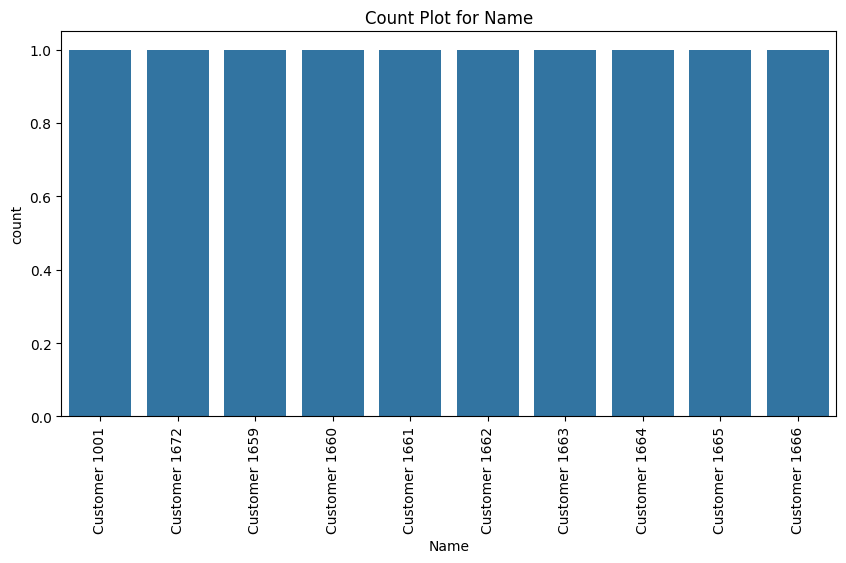

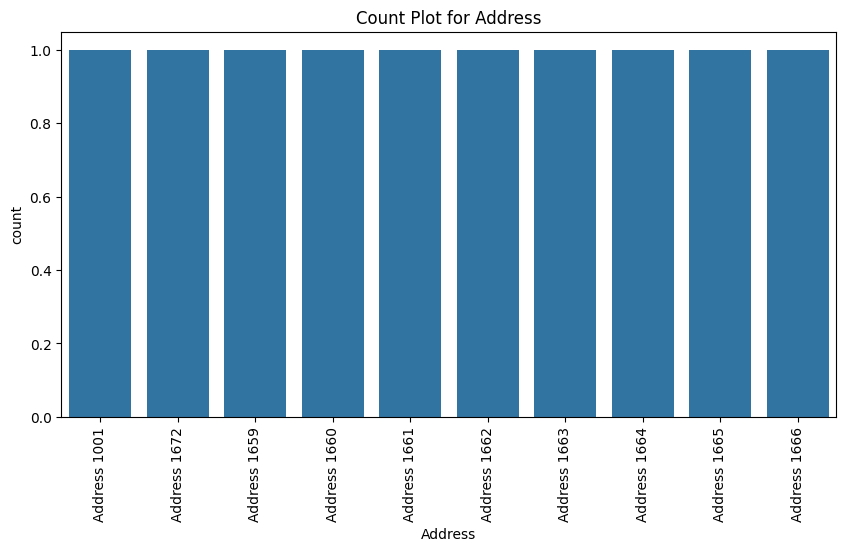

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dictionary to DataFrame if data is a dictionary
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Now proceed with the visualization
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()

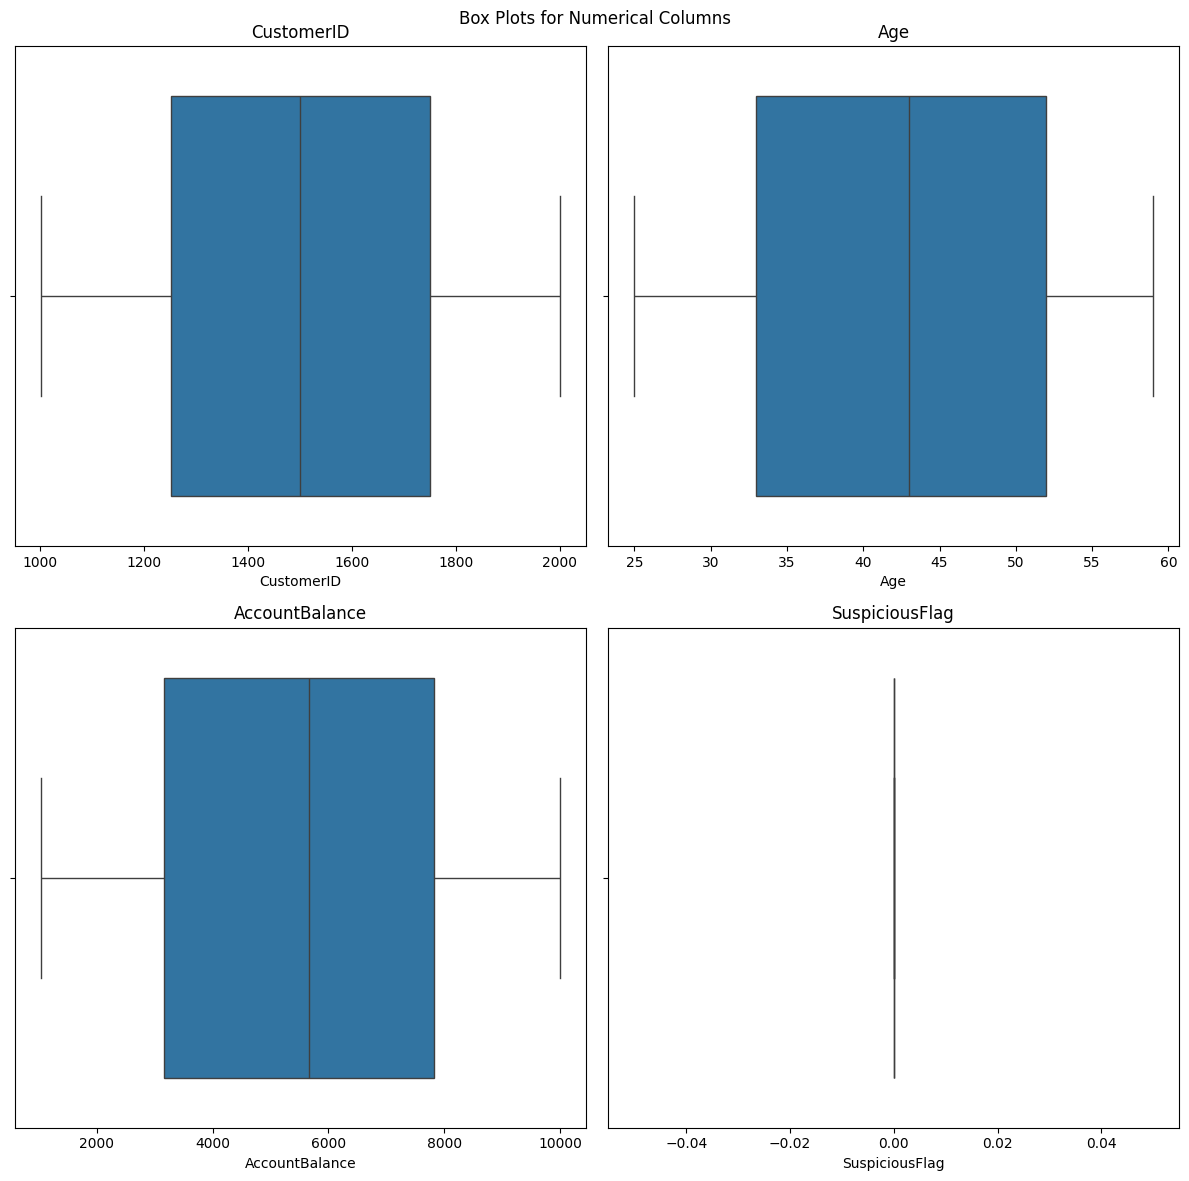

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

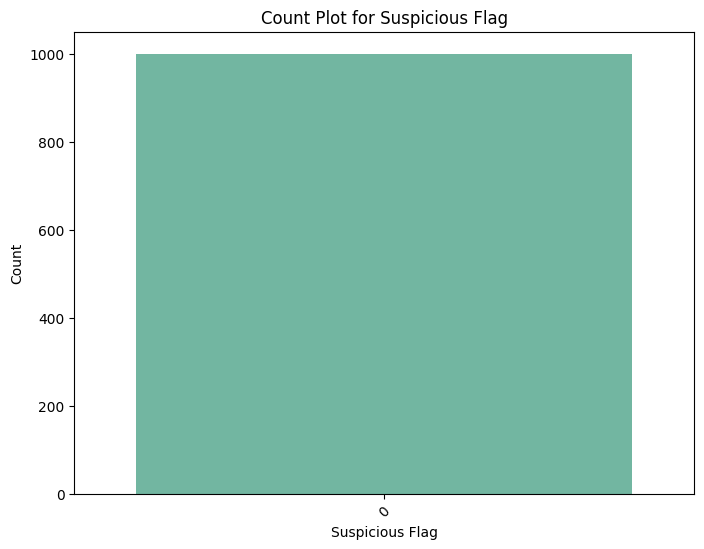

In [55]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

In [56]:
data['SuspiciousFlag'].value_counts()

SuspiciousFlag
0    1000
Name: count, dtype: int64

In [58]:
suspicious_dict = {"SuspiciousFlag": np.zeros(n, dtype=int)}

# Or if you're trying to create a variable
SuspiciousFlag = np.zeros(n, dtype=int)

In [59]:
import numpy as np

flag_idx = np.random.choice(data.index, size=50, replace=False)
data.loc[flag_idx, 'SuspiciousFlag'] = 1

In [60]:
data['SuspiciousFlag'].value_counts()

SuspiciousFlag
0    950
1     50
Name: count, dtype: int64

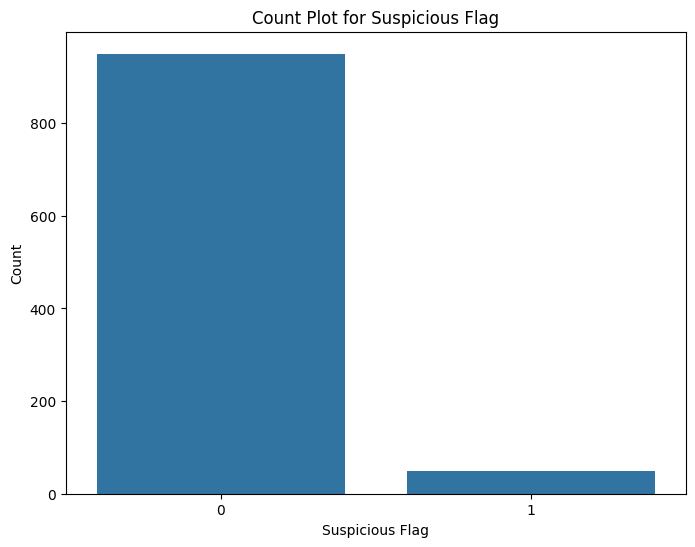

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SuspiciousFlag', data=data)
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.show()

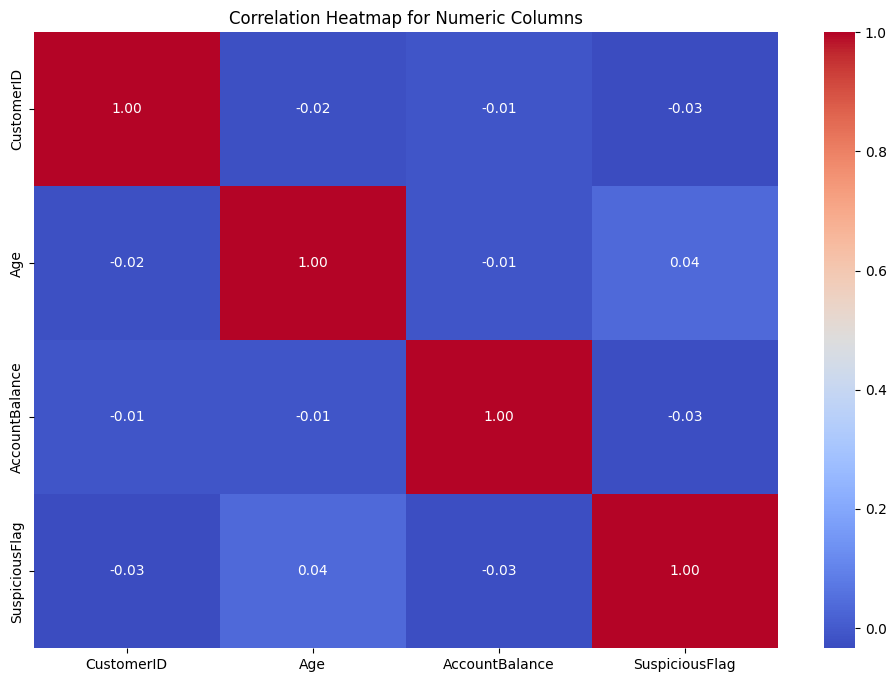

In [62]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()

In [77]:


# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [80]:
print(list(data.columns))

['CustomerID', 'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin', 'SuspiciousFlag', 'FraudIndicator']


In [81]:
transactions
customers

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,56,Address 1001,5377.217338,2023-03-01,0
1,1002,Customer 1002,46,Address 1002,4680.596594,2022-05-09,0
2,1003,Customer 1003,32,Address 1003,7946.937825,2022-05-10,0
3,1004,Customer 1004,25,Address 1004,1109.827651,2023-07-26,0
4,1005,Customer 1005,38,Address 1005,6385.984311,2023-07-14,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,41,Address 1996,4531.543494,2023-02-28,0
996,1997,Customer 1997,32,Address 1997,9605.999716,2022-05-22,0
997,1998,Customer 1998,46,Address 1998,2198.305038,2022-10-18,0
998,1999,Customer 1999,25,Address 1999,1919.345767,2023-03-08,0


In [82]:
transactions.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID'],
      dtype='object')

In [83]:
data = transactions.merge(
    customers[['CustomerID','AccountBalance','LastLogin','SuspiciousFlag']],
    on='CustomerID',
    how='left'
)

In [84]:
print(list(data.columns))

['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount', 'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID', 'AccountBalance', 'LastLogin', 'SuspiciousFlag']


In [85]:
columns_to_keep = [
    'FraudIndicator',
    'Category',
    'TransactionAmount',
    'AnomalyScore',
    'Timestamp',
    'Amount',
    'AccountBalance',
    'LastLogin',
    'SuspiciousFlag'
]

data1 = data[columns_to_keep].copy()
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Food,40.373229,0.599968,2022-01-01 00:00:00,23.613786,5543.603937,2024-06-02,0
1,0,Online,75.651739,0.485647,2022-01-01 01:00:00,35.620726,1567.981298,2023-10-16,0
2,0,Online,61.590088,0.545924,2022-01-01 02:00:00,43.837410,1820.480414,2023-11-21,0
3,0,Other,40.388437,0.926205,2022-01-01 03:00:00,78.067909,5111.727804,2022-03-24,0
4,0,Retail,98.966948,0.871315,2022-01-01 04:00:00,58.569561,5790.341920,2023-10-13,0


In [86]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    1000
 Name: count, dtype: int64,
 SuspiciousFlag
 0    1000
 Name: count, dtype: int64,
 Category
 Online    217
 Other     206
 Food      202
 Retail    190
 Travel    185
 Name: count, dtype: int64)

In [87]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is already in datetime format.


In [88]:


data1.head()



,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Food,40.373229,0.599968,2022-01-01 00:00:00,23.613786,5543.603937,2024-06-02,0
1,0,Online,75.651739,0.485647,2022-01-01 01:00:00,35.620726,1567.981298,2023-10-16,0
2,0,Online,61.590088,0.545924,2022-01-01 02:00:00,43.837410,1820.480414,2023-11-21,0
3,0,Other,40.388437,0.926205,2022-01-01 03:00:00,78.067909,5111.727804,2022-03-24,0
4,0,Retail,98.966948,0.871315,2022-01-01 04:00:00,58.569561,5790.341920,2023-10-13,0


In [92]:
X = data1.drop(['FraudIndicator','Timestamp','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [93]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag
0,0,40.373229,0.599968,23.613786,5543.603937,0
1,1,75.651739,0.485647,35.620726,1567.981298,0
2,1,61.590088,0.545924,43.837410,1820.480414,0
3,2,40.388437,0.926205,78.067909,5111.727804,0
4,3,98.966948,0.871315,58.569561,5790.341920,0
...,...,...,...,...,...,...
995,0,80.917312,0.869352,89.151642,6996.761973,0
996,1,91.292329,0.736826,46.902141,3092.962225,0
997,3,34.067375,0.501040,53.379543,8564.071656,0
998,1,83.115165,0.572761,16.341461,4106.729304,0


In [94]:


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)



In [95]:
X_train.shape,Y_test.shape

((800, 6), (200,))

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a logistic regression model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


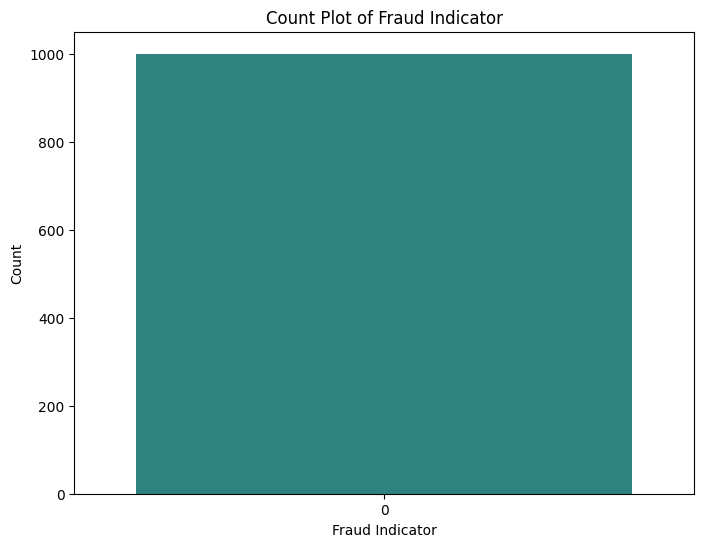

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'FraudIndicator' column
# Load your data into the DataFrame if not already done

# Create a count plot for the 'FraudIndicator' column
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.countplot(data=data1, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

In [98]:
import numpy as np

np.random.seed(42)

fraud_idx = np.random.choice(data1.index, size=45, replace=False)
data1.loc[fraud_idx, 'FraudIndicator'] = 1

In [99]:
data1['FraudIndicator'].value_counts()

FraudIndicator
0    955
1     45
Name: count, dtype: int64

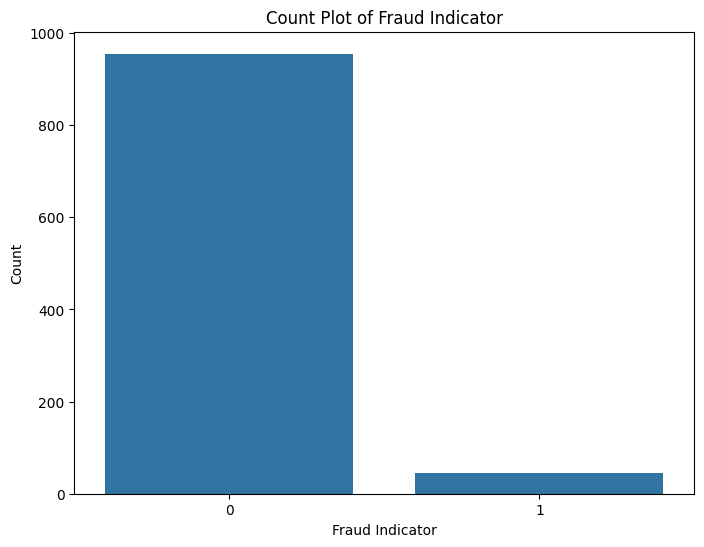

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='FraudIndicator')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

Class distribution after oversampling: Counter({0: 955, 1: 955})


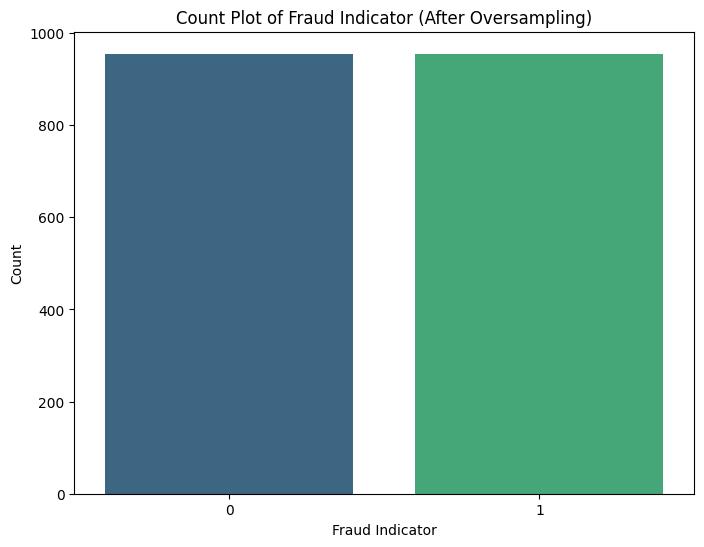

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter


# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Create a count plot for the 'FraudIndicator' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

In [102]:
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model Evaluation Metrics:
Accuracy: 0.97
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[194   6]
 [  0   0]]


In [103]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

# Shuffle the dataset to introduce slight randomness (you can adjust the `random_state` for different outcomes)
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Split data into train and test sets (keep the test set separate for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the model
model = DecisionTreeClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [None, 10, 25, 50,100,250],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 50,100,250],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 10, 30,75,100],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Criterion to measure the quality of a split
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model using the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Evaluation Metrics:
Accuracy: 0.8673647469458988
Precision: 0.8459016393442623
Recall: 0.8989547038327527
F1 Score: 0.8716216216216216
Confusion Matrix:
[[239  47]
 [ 29 258]]


In [104]:
# Inference on new/unseen data (for example, use a separate unseen dataset or a specific test sample)
# Here we simulate it by using the first row from the X_test
unseen_sample = X_test.iloc[0].values.reshape(1, -1)  # Reshaping for a single sample

# Predict the label for the unseen sample
inference_prediction = best_model.predict(unseen_sample)

# Map prediction result to 'fraud' or 'not fraud'
fraud_status = "Fraud" if inference_prediction[0] == 1 else "Not Fraud"

print("Inference Prediction for Unseen Sample:", fraud_status)

Inference Prediction for Unseen Sample: Fraud


In [106]:
# First, we need to fit the model with training data
# Assuming you have X_train and y_train available

# 1. Fit the model
model.fit(X_train, y_train)

# 2. Now we can make predictions
proba = model.predict_proba(unseen_sample)
print("Probability [Not Fraud, Fraud]:", proba)

Probability [Not Fraud, Fraud]: [[0. 1.]]


In [108]:
print(X_train.columns)

Index(['Category', 'TransactionAmount', 'AnomalyScore', 'Amount',
       'AccountBalance', 'SuspiciousFlag'],
      dtype='object')


In [109]:
unseen_values = [
    90.0,     # TransactionAmount
    0.85,     # AnomalyScore
    95.0,     # Amount
    3000.0,   # AccountBalance
    1         # SuspiciousFlag
]

In [111]:
print(list(X_train.columns))
print("Number of features:", len(X_train.columns))

['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag']
Number of features: 6


In [112]:
unseen_df = pd.DataFrame([{
    'TransactionAmount': 90.0,
    'AnomalyScore': 0.85,
    'Amount': 95.0,
    'AccountBalance': 3000.0,
    'SuspiciousFlag': 1,
    # ADD the 6th column here exactly as shown in X_train.columns
}])

In [113]:
unseen_df = unseen_df.reindex(columns=X_train.columns)

In [114]:
unseen_values = [v1, v2, v3, v4, v5, v6]   # must be 6 values
unseen_df = pd.DataFrame([unseen_values], columns=X_train.columns)

NameError: name 'v1' is not defined

In [115]:
# First, define the values for v1 through v6
v1 = 1.0  # Replace with your actual value
v2 = 2.0  # Replace with your actual value
v3 = 3.0  # Replace with your actual value
v4 = 4.0  # Replace with your actual value
v5 = 5.0  # Replace with your actual value
v6 = 6.0  # Replace with your actual value

# Now create the DataFrame with the defined values
unseen_values = [v1, v2, v3, v4, v5, v6]   # must be 6 values
unseen_df = pd.DataFrame([unseen_values], columns=X_train.columns)

In [117]:
assert len(unseen_values) == len(X_train.columns), "Unseen sample length must match training features"

In [118]:
print(list(X_train.columns))

['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag']


In [119]:
X_train.dtypes

Category               int32
TransactionAmount    float64
AnomalyScore         float64
Amount               float64
AccountBalance       float64
SuspiciousFlag         int32
dtype: object

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# X and y (adjust if your target name differs)
features = ['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag']
X = data1[features].copy()
y = data1['FraudIndicator'].astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess: one-hot encode Category, pass numeric through
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category']),
        ('num', 'passthrough', ['TransactionAmount','AnomalyScore','Amount','AccountBalance','SuspiciousFlag'])
    ]
)

# Model pipeline
pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Fit
pipe.fit(X_train, y_train)

# ---- Inference on an unseen sample ----
unseen_df = pd.DataFrame([{
    'Category': 'Online',          # choose one: Food/Retail/Online/Travel/Other
    'TransactionAmount': 90.0,
    'AnomalyScore': 0.85,
    'Amount': 95.0,
    'AccountBalance': 3000.0,
    'SuspiciousFlag': 1
}])

proba = pipe.predict_proba(unseen_df)
pred = pipe.predict(unseen_df)[0]

print("Probability [Not Fraud, Fraud]:", proba)
print("Inference Prediction for Unseen Sample:", "Fraud" if pred == 1 else "Not Fraud")

Probability [Not Fraud, Fraud]: [[0.34397123 0.65602877]]
Inference Prediction for Unseen Sample: Fraud
